# Project Proposal and Data Preparation

We will start by developing a project proposal and selecting your data. Now imagine working with a firm that has explored a multitude of data sources. Your manager has asked us as a data scientist to provide some data analytics guidance for one of the firm's clients. We would work iteratively with your client to understand the data wanting to be analyzed. Having a solid understanding of the data and underlying assumptions present is crucial to the success of a data analysis project.

To begin, we will prepare a project proposal detailing :

1. The questions we are wanting to answer. 

2. The initial hypotheses about the data relationships and 

3. The approach you will take to get your answers.

In [1]:
url = 'https://coursera-assessments.s3.amazonaws.com/assessments/1629178197652/5d31db7e-3f6b-4712-ee93-8d2ab553f56d/Data%20Analysis%20for%20SportsStats.pdf'

In [2]:
#My Project Proposal

import webbrowser as wb
wb.open(url)

True

# Understanding the Data

There are three key reasons why you need to understand your data. First and foremost, in the eyes of your stakeholders, showing your understanding of the data builds trust and confidence in you and your work product.You want to make sure you take time to complete your preliminary exploratory analysis, create a baseline of your statistics and have them readily available, understand any obvious correlations, and discover where there are gaps.

Second, Understanding your data is crucial to your machine learning workflow. A strong contextual knowledge of your data, which is often domain-specific, allows you to perform feature engineering more easily. Feature engineering involves the selection and preparation of attributes to use in your model building. If you don't know what your data is saying, how it's connected or the issues with it, it would be like throwing a dart at a dartboard blind. You could get lucky or completely miss your target.

Lastly, having that solid understanding of the data will help when it comes to visualizing the data and communicating results. A key part of data visualization involves selecting the right data to display and presenting your results in a way that makes sense of your customers or stakeholders.

# Descriptive Statistics

In [3]:
#IMPORTS 

import pandas as pd
from pandas import DataFrame as df
from pandas import Series as sr
import matplotlib.pyplot as plt

import sqlite3 as sql
%matplotlib inline

In [4]:
conn = sql.connect('SportsStats.db')

In [5]:
#Create a function to make a data frame it not long to type all every time.

def sql_to_df(query) :
    df = pd.read_sql(query,conn)
    return(df)

In [6]:
query = '''
SELECT
 *
FROM
 athlete_events_edited

'''


df = sql_to_df(query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    271116 non-null  object
 1   Sex     271116 non-null  object
 2   Age     271116 non-null  int64 
 3   Height  271116 non-null  int64 
 4   Weight  271116 non-null  int64 
 5   Team    271116 non-null  object
 6   NOC     271116 non-null  object
 7   Games   271116 non-null  object
 8   Year    271116 non-null  int64 
 9   Season  271116 non-null  object
 10  City    271116 non-null  object
 11  Sport   271116 non-null  object
 12  Event   271116 non-null  object
 13  Medal   271116 non-null  object
dtypes: int64(4), object(10)
memory usage: 29.0+ MB


In [5]:
#DON'T RUN THIS LINE UNLESS YOU WANT TO DISCONNECT WITH THE DATABASE
conn.close()

In [7]:
#Create an atheletes table to be analyzed their aggregated data for the age, height, and weight
#AVERAGE

query = '''

SELECT
 Name,
 COUNT(Name) AS number_of_event_participated,
 Sex,
 AVG(Age) AS age_average ,
 AVG(Height) AS height_average,
 AVG(weight) AS weight_average 
FROM 
 (
 SELECT 
  *
 FROM
  athlete_events_edited
 WHERE
  Age > 0 AND Height > 0 AND Weight > 0
  ) subtable
GROUP BY 
 Name
ORDER BY 
 number_of_event_participated DESC


'''

athletes_df_avg = sql_to_df(query)
athletes_df_avg

,Name,number_of_event_participated,Sex,age_average,height_average,weight_average
0,Heikki Ilmari Savolainen,39,M,31.487179,172.000000,64.00000
1,"Joseph ""Josy"" Stoffel",38,M,27.789474,167.000000,67.00000
2,Takashi Ono,33,M,26.787879,160.636364,58.69697
3,Andreas Wecker,32,M,24.000000,160.000000,62.00000
4,Michel Mathiot,31,M,27.419355,163.000000,65.00000
...,...,...,...,...,...,...
98540,Aadam Ismaeel Khamis,1,M,19.000000,172.000000,67.00000
98541,"A. W. Nancy ""Nan"" Rae",1,F,16.000000,156.000000,53.00000
98542,"A. J. Tyronne Benildus ""Benny"" Fernando",1,M,27.000000,179.000000,70.00000
98543,A Lamusi,1,M,23.000000,170.000000,60.00000


In [8]:
#Create an atheletes table to be analyzed their aggregated data for the age, height, and weight
#MAXIMUM

query = '''

SELECT
 Name,
 COUNT(Name) AS number_of_event_participated,
 Sex,
 MAX(Age)    AS age_max ,
 MAX(Height) AS height_max,
 MAX(weight) AS weight_max 
FROM 
 (
 SELECT 
  *
 FROM
  athlete_events_edited
 WHERE
  Age > 0 AND Height > 0 AND Weight > 0
  ) subtable
GROUP BY 
 Name
ORDER BY 
 number_of_event_participated DESC


'''

athletes_df_max = sql_to_df(query)
athletes_df_max

,Name,number_of_event_participated,Sex,age_max,height_max,weight_max
0,Heikki Ilmari Savolainen,39,M,44,172,64
1,"Joseph ""Josy"" Stoffel",38,M,36,167,67
2,Takashi Ono,33,M,33,181,81
3,Andreas Wecker,32,M,30,160,62
4,Michel Mathiot,31,M,34,163,65
...,...,...,...,...,...,...
98540,Aadam Ismaeel Khamis,1,M,19,172,67
98541,"A. W. Nancy ""Nan"" Rae",1,F,16,156,53
98542,"A. J. Tyronne Benildus ""Benny"" Fernando",1,M,27,179,70
98543,A Lamusi,1,M,23,170,60


In [9]:
#Create an atheletes table to be analyzed their aggregated data for the age, height, and weight
#MINIMUM

query = '''

SELECT
 Name,
 COUNT(Name) AS number_of_event_participated,
 Sex,
 MIN(Age)    AS age_min ,
 MIN(Height) AS height_min,
 MIN(weight) AS weight_min 
FROM 
 (
 SELECT 
  *
 FROM
  athlete_events_edited
 WHERE
  Age > 0 AND Height > 0 AND Weight > 0
  ) subtable
GROUP BY 
 Name
ORDER BY 
 number_of_event_participated DESC


'''

athletes_df_min = sql_to_df(query)
athletes_df_min

,Name,number_of_event_participated,Sex,age_min,height_min,weight_min
0,Heikki Ilmari Savolainen,39,M,20,172,64
1,"Joseph ""Josy"" Stoffel",38,M,20,167,67
2,Takashi Ono,33,M,20,160,58
3,Andreas Wecker,32,M,18,160,62
4,Michel Mathiot,31,M,21,163,65
...,...,...,...,...,...,...
98540,Aadam Ismaeel Khamis,1,M,19,172,67
98541,"A. W. Nancy ""Nan"" Rae",1,F,16,156,53
98542,"A. J. Tyronne Benildus ""Benny"" Fernando",1,M,27,179,70
98543,A Lamusi,1,M,23,170,60


In [10]:
# We're gonna take the AVERAGE aggregated to see the statistic description

athletes_df_avg.describe()

,number_of_event_participated,age_average,height_average,weight_average
count,98545.000000,98545.000000,98545.000000,98545.000000
mean,2.092090,24.945583,176.365977,71.956113
std,2.049599,4.803732,10.378690,14.537029
min,1.000000,11.000000,127.000000,25.000000
25%,1.000000,22.000000,170.000000,62.000000
50%,1.000000,24.000000,176.000000,71.000000
75%,2.000000,27.000000,183.000000,80.000000
max,39.000000,68.000000,226.000000,214.000000


## Question Number 1

In [11]:
#Question Number 1
#Ranking countries who has the most medals 
#(Assumption :- If the event involves a team, all medals of the members frpm the team are aggregated 
#             - gold, silver, bronze medals doesn't matter)

query = '''

SELECT 
 code.NOC,
 code.region AS Country,
 SUM(subtable.won_medal) AS medals_the_country_have
FROM
 (
 SELECT
  *,
  (CASE
   WHEN Medal = "No Medal" THEN CAST(0 AS INT)
   ELSE CAST(1 AS INT)
   END
  ) won_medal
 FROM 
  athlete_events_edited
 ) subtable
INNER JOIN 
 code_country code
ON
 code.NOC = subtable.NOC
GROUP BY 
 code.NOC,
 code.region
ORDER BY 
 medals_the_country_have DESC
LIMIT 20
 
'''

country_medal_df = sql_to_df(query)
country_medal_df

,NOC,Country,medals_the_country_have
0,USA,USA,5637
1,URS,Russia,2503
2,GER,Germany,2165
3,GBR,UK,2068
4,FRA,France,1777
5,ITA,Italy,1637
6,SWE,Sweden,1536
7,CAN,Canada,1352
8,AUS,Australia,1320
9,RUS,Russia,1165


## Question 2

In [12]:
#Question Number 2
#What is the age and height average of the athletes in each sports
#and in each gender?

query = '''

SELECT 
 Sport,
 Sex,
 AVG(Age),
 AVG(Height)
FROM
 (
  SELECT 
   *
  FROM
   athlete_events_edited
  WHERE
   Age > 0 AND Height > 0
  ) subtable
GROUP BY 
 Sport,
 Sex
LIMIT 50

'''

avg_age_and_height = sql_to_df(query)
avg_age_and_height

,Sport,Sex,AVG(Age),AVG(Height)
0,Alpine Skiing,F,22.372252,167.221001
1,Alpine Skiing,M,23.990102,177.911182
2,Archery,F,25.895143,167.157837
3,Archery,M,27.112717,178.477842
4,Art Competitions,F,52.000000,160.000000
5,Art Competitions,M,43.155172,174.896552
6,Athletics,F,25.097231,169.294780
7,Athletics,M,25.434108,179.827983
8,Badminton,F,25.173333,168.438519
9,Badminton,M,26.345506,179.620787


## Question 3

In [13]:
#Question 3
#Who won the most olympic medals throughout the athlete’s career and in which sport he/she competed?
#(ranking the athletes from the most to the least medals he/she received)

query = '''

SELECT 
 Name,
 subtable.NOC, 
 code.region,
 SUM(won_medal) AS medals_the_athlete_won
FROM
 (
 SELECT
   *,
   (CASE
    WHEN Medal = "No Medal" THEN CAST(0 AS INT)
    ELSE CAST(1 AS INT)
    END
   ) won_medal
  FROM 
   athlete_events_edited
 ) subtable
INNER JOIN 
 code_country code
ON
 code.NOC = subtable.NOC
GROUP BY 
 Name,
 code.NOC,
 code.region
HAVING 
 code.NOC = 'USA'
ORDER BY 
 SUM(won_medal) DESC


'''

athletes_rank = sql_to_df(query)
athletes_rank




,Name,NOC,region,medals_the_athlete_won
0,"Michael Fred Phelps, II",USA,USA,28
1,"Dara Grace Torres (-Hoffman, -Minas)",USA,USA,12
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,USA,12
3,Natalie Anne Coughlin (-Hall),USA,USA,12
4,Ryan Steven Lochte,USA,USA,12
...,...,...,...,...
9647,"Zachery ""Zach"" Ziemek",USA,USA,0
9648,Zaddick Xavier Longenbach,USA,USA,0
9649,Zahir A. Raheem,USA,USA,0
9650,"Zantzinger, Borie & Medary",USA,USA,0


## Question 4

In [14]:
#Question 4
#How was the top 5 countries (from table answering number 1) perform throughout the olympic years?

In [15]:
USA	USA	5637
1	URS	Russia	2503
2	GER	Germany	2165
3	GBR	UK	2068
4	FRA	

SyntaxError: invalid syntax (<ipython-input-15-5548971ff4dc>, line 1)

In [16]:
#Restate or rerun the table that answer question number 1, but limit to only top 5 countries and
#also add the year column to the table for become the x-axis in the later graphs.

query = '''

SELECT 
 Year,
 code.NOC,
 code.region AS Country,
 SUM(subtable.won_medal) AS medals_the_country_have
FROM
 (
 SELECT
  *,
  (CASE
   WHEN Medal = "No Medal" THEN CAST(0 AS INT)
   ELSE CAST(1 AS INT)
   END
  ) won_medal
 FROM 
  athlete_events_edited
 ) subtable
INNER JOIN 
 code_country code
ON
 code.NOC = subtable.NOC
GROUP BY 
 Year,
 code.NOC,
 code.region
HAVING 
 code.NOC = 'USA' OR 
 code.NOC = 'URS' OR 
 code.NOC = 'GER' OR 
 code.NOC = 'GBR' OR 
 code.NOC = 'FRA'
 
'''

country_medal_df = sql_to_df(query)
country_medal_df

,Year,NOC,Country,medals_the_country_have
0,1896,FRA,France,11
1,1896,GBR,UK,9
2,1896,GER,Germany,32
3,1896,USA,USA,20
4,1900,FRA,France,235
...,...,...,...,...
136,2014,USA,USA,64
137,2016,FRA,France,96
138,2016,GBR,UK,145
139,2016,GER,Germany,159


In [17]:
#Using Python, use a group by statement to create a new table

In [18]:
country_medal_yearly = country_medal_df.groupby(['Year','Country'])['medals_the_country_have'].sum().unstack()
country_medal_yearly

Country,France,Germany,Russia,UK,USA
Year,,,,,
1896,11.0,32.0,NaN,9.0,20.0
1900,235.0,45.0,NaN,108.0,63.0
1904,2.0,16.0,NaN,2.0,394.0
1906,64.0,30.0,NaN,39.0,24.0
1908,40.0,21.0,NaN,368.0,65.0
1912,26.0,53.0,NaN,170.0,107.0
1920,141.0,NaN,NaN,111.0,194.0
1924,120.0,NaN,NaN,95.0,194.0
1928,52.0,82.0,NaN,59.0,102.0


In [19]:
#Replace null value with 0 using numpy and pandas

import pandas as pd
import numpy as np

country_medal_yearly.replace(np.nan,0,inplace=True)

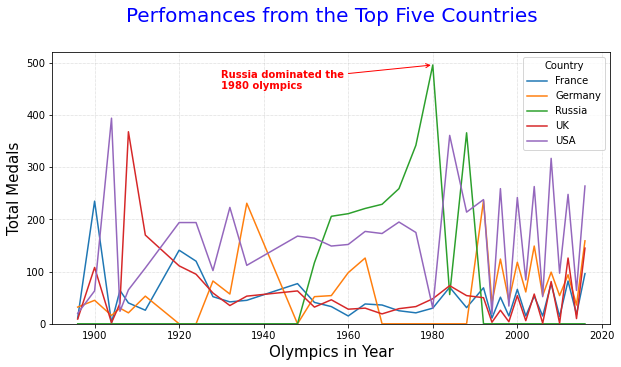

In [20]:
country_medal_yearly.plot()
plt.title('Perfomances from the Top Five Countries', loc='center',pad=30,
          fontsize=20, color='blue')
plt.xlabel('Olympics in Year',fontsize=15)
plt.ylabel('Total Medals', fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.annotate('Russia dominated the\n1980 olympics', xy=(1980, 496), xytext=(1930, 450),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.show()

## Sports Participation by Gender (Answering 1st Hypothesis)

In [21]:
#Next, we're going to see the level of participation for each sports by gender.

query = '''


  SELECT 
   Sport,
   Sex,
   COUNT(Sex) AS counts
  FROM 
   athlete_events_edited
  GROUP BY 
   Sport,
   Sex
  LIMIT 100


'''

participation_df = sql_to_df(query)
participation_df

,Sport,Sex,counts
0,Aeronautics,M,1
1,Alpine Skiing,F,3398
2,Alpine Skiing,M,5431
3,Alpinism,F,1
4,Alpinism,M,24
...,...,...,...
95,Swimming,M,13345
96,Synchronized Swimming,F,909
97,Table Tennis,F,953
98,Table Tennis,M,1002


In [22]:
query = '''


 SELECT 
 Sport,
 (
  CASE
  WHEN Sex = "M" THEN counts
  ELSE 0
  END
 ) AS Male,
 (
  CASE
  WHEN Sex = "F" THEN counts
  ELSE 0
  END
 ) AS Female
FROM 
 (
  SELECT 
   Sport,
   Sex,
   COUNT(Sex) AS counts
  FROM 
   athlete_events_edited
  GROUP BY 
   Sport,
   Sex
  ) subtable
GROUP BY 
 Sport,
 Sex


'''

participation_df = sql_to_df(query)
participation_df

,Sport,Male,Female
0,Aeronautics,1,0
1,Alpine Skiing,0,3398
2,Alpine Skiing,5431,0
3,Alpinism,0,1
4,Alpinism,24,0
...,...,...,...
111,Water Polo,3358,0
112,Weightlifting,0,463
113,Weightlifting,3474,0
114,Wrestling,0,304


In [23]:
query = '''

SELECT 
 Sport,
 MAX(Male)   AS Male,
 MAX(Female) AS Female 
FROM 
 (
  SELECT 
   Sport,
   (
    CASE
    WHEN Sex = "M" THEN counts
    ELSE 0
    END
   ) AS Male,
   (
    CASE
    WHEN Sex = "F" THEN counts
    ELSE 0
    END
   ) AS Female
  FROM 
   (
    SELECT 
     Sport,
     Sex,
     COUNT(Sex) AS counts
    FROM 
     athlete_events_edited
    GROUP BY 
     Sport,
     Sex
    ) subtable
 GROUP BY 
  Sport,
  Sex
 ) subsubtable
GROUP BY 
 Sport
HAVING 
 MAX(Female) > MAX(Male)
ORDER BY 
 Female DESC

'''

participation_df = sql_to_df(query)
participation_df

,Sport,Male,Female
0,Figure Skating,1126,1172
1,Synchronized Swimming,0,909
2,Badminton,717,740
3,Rhythmic Gymnastics,0,658
4,Softball,0,478


In [24]:
query = '''

SELECT 
 SUM(woman) AS woman_sports
FROM
 (
 SELECT 
  Sport,
  (CASE 
   WHEN Female > Male THEN 1
   WHEN Female < Male THEN 0
   ELSE NULL
   END
   ) woman
 FROM
  (
  SELECT 
   Sport,
   MAX(Male)   AS Male,
   MAX(Female) AS Female 
  FROM 
   (
    SELECT 
     Sport,
     (
      CASE
      WHEN Sex = "M" THEN counts
      ELSE 0
      END
     ) AS Male,
     (
      CASE
      WHEN Sex = "F" THEN counts
      ELSE 0
      END
     ) AS Female
    FROM 
     (
      SELECT 
       Sport,
       Sex,
       COUNT(Sex) AS counts
      FROM 
       athlete_events_edited
      GROUP BY 
       Sport,
       Sex
      ) subtable
   GROUP BY 
    Sport,
    Sex
   ) subsubtable
  GROUP BY 
   Sport
  ORDER BY 
   Female DESC
  )sub3xtable
 )sub4xtable

'''

participation_df = sql_to_df(query)
participation_df

,woman_sports
0,5


## Does Aging Improves the Athlete's Performances? (Answering 2nd Hypothesis)

In [25]:
query = '''

SELECT
 Age,
 (CASE
  WHEN Medal = "No Medal" THEN CAST(0 AS INT)
  WHEN Medal = "Gold"     THEN CAST(3 AS INT)
  WHEN Medal = "Silver"   THEN CAST(2 AS INT)
  WHEN Medal = "Bronze"   THEN CAST(1 AS INT)
  END
 ) won_medal
FROM 
 athlete_events_edited
WHERE 
 NOC = "USA" AND Age > 0
ORDER BY 
 won_medal DESC
'''

aging_medal = sql_to_df(query)
aging_medal

,Age,won_medal
0,23,3
1,23,3
2,15,3
3,19,3
4,22,3
...,...,...
18550,27,0
18551,31,0
18552,31,0
18553,25,0


In [26]:
aging_medal.corr()

,Age,won_medal
Age,1.000000,-0.106543
won_medal,-0.106543,1.000000


<Figure size 432x288 with 0 Axes>

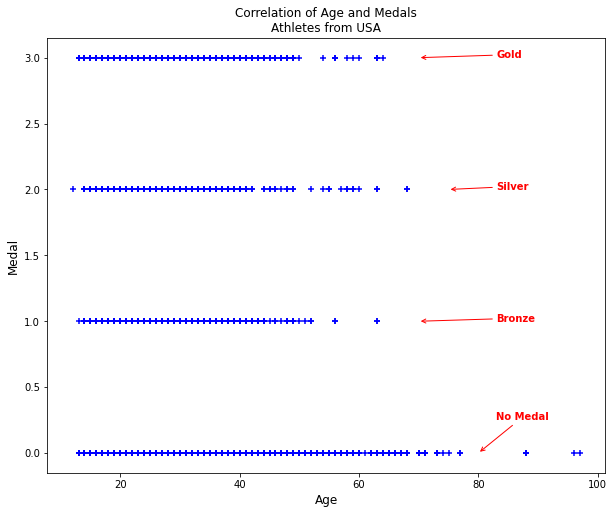

In [27]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(aging_medal['Age'], aging_medal['won_medal'], marker='+', color='blue')
plt.title('Correlation of Age and Medals\nAthletes from USA')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel('Medal', fontsize = 12)
plt.annotate('Gold', xy=(70, 3), xytext=(83, 3),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.annotate('Silver', xy=(75, 2), xytext=(83, 2),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.annotate('Bronze', xy=(70, 1), xytext=(83, 1),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.annotate('No Medal', xy=(80, 0), xytext=(83, 0.25),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.show()

In [28]:
query = '''

SELECT 
 won_medal,
 COUNT(*)
FROM
 (
 SELECT
  Age,
  (CASE
   WHEN Medal = "No Medal" THEN CAST(0 AS INT)
   WHEN Medal = "Gold"     THEN CAST(3 AS INT)
   WHEN Medal = "Silver"   THEN CAST(2 AS INT)
   WHEN Medal = "Bronze"   THEN CAST(1 AS INT)
   END
  ) won_medal
 FROM 
  athlete_events_edited
 WHERE 
  NOC = "USA"
 ORDER BY 
  won_medal DESC
 ) subtable
GROUP BY 
 won_medal
'''

aging_medal = sql_to_df(query)
aging_medal

,won_medal,COUNT(*)
0,0,13216
1,1,1358
2,2,1641
3,3,2638
